## Array-based calculation with Numpy
At the core of the scientific ecosystem of Python, there is Numpy, a library for accessing, manipulations and efficiently operating multidimensional *arrays* of data. 

These arrays are the foundation of many other libraries (such as Pandas DataFrames) and are essential in computing-intensive applications of Python, as they allow to overcome the limited performance of the language by delegating these costly calculations to more efficient languages such as C. Additionally, Numpy does also allow to *vectorize* operations, allowing to do complex operations over complete arrays of data without requiring explicit loops that would greatly reduce the overall performance.

Here, we will see a very basic overview of Numpy: although at this point we will not need the stong number-crushing capabilities of the library, arrays can be extremely convenient to do operations over vectors or matrices.

### Numpy arrays
In terms of pure Python, we could consider a 1D Numpy array as a modification over a *list* of numbers. A 2D array (matrix) would be similar to a list of lists, where each inner list is a *row* of the array. We may also consider the parallelism with a DataFrame (N rows x M columns): however, arrays do not have column names, explicit row indices, and neither contain mixed data types.

We can easily define arrays both lists or lists of lists, as well as generating them from numeric DataFrames. 

A key method of arrays is its `.shape`, which corresponds to the (NxM) size.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Defining a simple array from a list.
arr1 = np.array([0,1,2,3,4,5])
print(arr1)
print(arr1.shape)
print("-----")
# And for 2D

arr2 = np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11]])
print(arr2)
print(arr2.shape)
print("-----")
# Load the DataFrame we filtered and saved, and transform to array
df = pd.read_csv("Selected_DF_wines.csv",index_col=0)
# We have to avoid non-numeric columns: remove the type
df2 = df.loc[:,["pH","sulphates","alcohol"]]

# Use the .to_numpy() method
arr3 = df2.to_numpy()
print(arr3)
print(arr3.shape)
print("-----")

[0 1 2 3 4 5]
(6,)
-----
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
(3, 4)
-----
[[ 3.    0.45  8.8 ]
 [ 3.3   0.49  9.5 ]
 [ 3.26  0.44 10.1 ]
 [ 3.19  0.4   9.9 ]
 [ 3.19  0.4   9.9 ]
 [ 3.26  0.44 10.1 ]
 [ 3.18  0.47  9.6 ]
 [ 3.    0.45  8.8 ]
 [ 3.3   0.49  9.5 ]
 [ 3.22  0.45 11.  ]
 [ 2.99  0.56 12.  ]
 [ 3.14  0.53  9.7 ]
 [ 3.18  0.63 10.8 ]
 [ 3.54  0.52 12.4 ]
 [ 2.98  0.67  9.7 ]
 [ 3.25  0.55 11.4 ]
 [ 3.24  0.36  9.6 ]
 [ 3.33  0.39 12.8 ]
 [ 3.12  0.53 11.3 ]
 [ 3.22  0.5   9.5 ]]
(20, 3)
-----


### Accessing arrays
In a Numpy array, we can either get individual elements or *slices* of the array (e.g., one column, a set of rows...). This is similar to what we did for DataFrames, but here we can only use numeric indices: specify the row and column number(s) we want to access, with a *semicolon* to allow any index.

In [3]:
# Get the third element of the first array
print(arr1[2])
print("-----")
# Get the second column of the second array, which shall be 1,5,9
print(arr2[:,1])
print("-----")
# Get rows 1, 3 and 7 and columns 1 and 2 of the third array
print(arr3[[1,3,7],0:2])
print("-----")

2
-----
[1 5 9]
-----
[[3.3  0.49]
 [3.19 0.4 ]
 [3.   0.45]]
-----


### Operating arrays
We can apply any operation we will do for numbers to arrays. However, if we operate two arrays together, their shapes must be consistent.

Numpy attempts to apply *broadcasting*: if two arrays do not have the same shape, it will try to adapt their shapes: for example, if we have a **(4,5)** array and we try to add a **(4,1)** array, it will take the **column** from the 2nd array (4 rows, 1 column) and add it to the five columns of the other one.

However, broadcasting can be tricky: if the second array was not **(4,1)** but only **(4,)** (monodimensional), it will be added across *rows*, which will not work because shapes do not match!. Be careful with array shapes and adapt them accordingly.

In [4]:
# We can add, multiply... scalar values
print("Sum 5")
print(arr2 + 5)
print("----")
print("Multiply by 5")
print(arr2 * 5)
print("----")
print("Square")
print(arr2**2)

Sum 5
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
----
Multiply by 5
[[ 0  5 10 15]
 [20 25 30 35]
 [40 45 50 55]]
----
Square
[[  0   1   4   9]
 [ 16  25  36  49]
 [ 64  81 100 121]]


In [5]:
# If we multiply two compatible arrays, it will operate element-wise
# More complex matrix multiplication requires specific operations (matmul) -> but we will not cover this
arr2b = np.array([[1,1,0,0],[1,1,0,2],[1,1,1,1]])
print("Before multiplication")
print(arr2)
print("After multiplication")
print(arr2*arr2b)

Before multiplication
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
After multiplication
[[ 0  1  0  0]
 [ 4  5  0 14]
 [ 8  9 10 11]]


In [6]:
# And we can chain operations as desired
print((arr2-5)*(arr2b**2) + 15)

[[10 11 15 15]
 [14 15 15 23]
 [18 19 20 21]]


In [7]:
# Broadcasting can be an issue

arr4 = np.array([[0,1,2,3,4],[5,6,7,8,9],[10,11,12,13,14],[15,16,17,18,19]])
arr5 = np.array(([10,10,10,10]))

print("Shape-arr4",arr4.shape,"Shape-arr5",arr5.shape)
# These CANNOT be added
arr4 + arr5

Shape-arr4 (4, 5) Shape-arr5 (4,)


ValueError: operands could not be broadcast together with shapes (4,5) (4,) 

In [8]:
# But we can RESHAPE an array:
arr6 = arr5.reshape(4,1)
print(arr6.shape)
# And columnwise sum works
arr4 + arr6

(4, 1)


array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [9]:
# Like with DataFrames, we can apply statistical operations, and specify if we want them across columns
# getting values for every row (axis=0) or across rows, getting column-wise aggregations (axis=1)
print(arr4)
print("Mean across columns")
print(np.mean(arr4,axis=0))
print("Sum across rows")
print(np.sum(arr4,axis=1))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
Mean across columns
[ 7.5  8.5  9.5 10.5 11.5]
Sum across rows
[10 35 60 85]


In [10]:
# A quite useful feature is the possibility to locate not only maxima and minima, but also their indices
print("Max value",np.max(arr4))

# Index of the maximum across columns, shown for every row
print("Max position",np.argmax(arr4,axis=0))

# Index of the maximum across rows,shown for every column
print("Max position",np.argmax(arr4,axis=1))

# If we just use argmax, we get a single index: we need unravel_index to transform it
# Here, the position 19, which corresponds to (3,4)
print("Max position",np.unravel_index(np.argmax(arr4),arr4.shape))

# Unravel allows to go from a position (e.g. 19th element in the array) to its corresponding index,
# given the shape of the target array

Max value 19
Max position [3 3 3 3 3]
Max position [4 4 4 4]
Max position (3, 4)


### Array creation
Apart from manually defining lists of lists, there are many tools to create arrays programatically.
- `np.linspace`. Create a 1D array from *start* to *stop* value, with a total of *step* values.
- `np.zeros`. Create an array full of zeros with a pre-specified *shape*.
- `np.full`. Create an array with a pre-specified *shape* and a *fill_value*.
- `np.arange`. Create a 1D array of INTEGERS from *start* to *stop* value, with a total of *step*.

In [11]:
lin_seq = np.linspace(0,20,10)
print("Sequence from 0 to 20",lin_seq)
arr_zeros = np.zeros((4,2))
print("4x2 array of zeros")
print(arr_zeros)
arr_full = np.full((4,1),fill_value=10)
print("4x1 array of tens")
print(arr_full)

Sequence from 0 to 20 [ 0.          2.22222222  4.44444444  6.66666667  8.88888889 11.11111111
 13.33333333 15.55555556 17.77777778 20.        ]
4x2 array of zeros
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
4x1 array of tens
[[10]
 [10]
 [10]
 [10]]


### Array reshaping
Previously mentioned, `np.reshape` allows to modify the shape of an array: however, we must be sure that the new shape is compatible. For example, we would not be able to take a 1D array of length 8 to be an array of size 4x3.

Default ordering fills rows first, adding consecutive values to columns until the row is full. This is also known as C-order.

*\[a,b,c,d,e,f\]* $\rightarrow$ **\[\[a,b,c\],\[d,e,f\]]**

TO go from a N-D array to a 1D one, we may use the `.flatten` attribute instead

In [12]:
lin_seq2 = np.linspace(0,30,16)
seq_arr = np.reshape(lin_seq2,(4,4))
print("4x4 array for range from 0 to 30")
print(seq_arr)

4x4 array for range from 0 to 30
[[ 0.  2.  4.  6.]
 [ 8. 10. 12. 14.]
 [16. 18. 20. 22.]
 [24. 26. 28. 30.]]


In [13]:
# We could switch this, and fill columns first, adding consecutive values to rows until the column is full
# Fortran (or F-) order
seq_arrF = np.reshape(lin_seq2,(4,4),order="F")
print("4x4 array for range from 0 to 30, F-order")
print(seq_arrF)

4x4 array for range from 0 to 30, F-order
[[ 0.  8. 16. 24.]
 [ 2. 10. 18. 26.]
 [ 4. 12. 20. 28.]
 [ 6. 14. 22. 30.]]


In [14]:
# Reverse operation: flattening
print("Re-flattened array")
print(seq_arr.flatten())
print("Re-flattened array: C-order and F-order mixed")
print(seq_arrF.flatten())

# Be careful!

Re-flattened array
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30.]
Re-flattened array: C-order and F-order mixed
[ 0.  8. 16. 24.  2. 10. 18. 26.  4. 12. 20. 28.  6. 14. 22. 30.]


### Vector operations
We can use arrays to do operations on vectors: e.g., scalar product (`np.dot`) and vectorial product (`np.cross`).

In [15]:
v1 = np.array([1,2,2])
v2 = np.array([-1,1,3])

print("Element-wise")
print(v1*v2)
print("Dot product, to a scalar")
print(np.dot(v1,v2))
print("Vectorial product")
print(np.cross(v1,v2))

Element-wise
[-1  2  6]
Dot product, to a scalar
7
Vectorial product
[ 4 -5  3]


### The efficiency of arrays
To demonstrate how Numpy arrays improve calculation performance, we will come back to the example from the lesson on loops and list comprehensions, benchmarking the two previous approaches against the Numpy solution.

In [16]:
# We will consider the operation i*2 + 5 
import time

iterations = 1000000

# For loop
start = time.time() # saving time at the start
myList = []
for i in range(iterations):
    myList.append(2*i+5)
end = time.time()

print(f"FOR loop time: {end-start}")

# List comprehension
start = time.time()
myList = [2*i+5 for i in range(iterations)]
end = time.time()
print(f"List comprehension time: {end-start}")

# Numpy
start = time.time()
vals = np.arange(0,iterations)
vals2 = 2*vals + 5
end = time.time()
print(f"Array time: {end-start}")

# And it is more than ten times faster than the list comprehension approach
# For larger arrays and/or more complex operations, arrays can be the only feasible solution

FOR loop time: 0.058241844177246094
List comprehension time: 0.04014444351196289
Array time: 0.0029039382934570312


### Application example: linear regression
Linear regression is one of the most widespread predictive models in science, correlating a given *response variable* $y$ with a set of *features* $x_0, x_1, x_2,...,x_n$, obtaining an equation of the form:
$y = \alpha_0 x_0 + \alpha_1 x_1 + ... + \alpha_n x_n + \beta $

Here, we will employ Numpy to perform a simple linear regression, with a single feature $x$ ($y = mx + n$). To do this, we will consider the expressions that result from the application of the *least squares* principle.

Defining the **residuals** of the observation **i** as $e_i = y_{pred,i} - y_i = mx_i + n - y_i$, we want the values of *m* and *n* that minimize the *mean squared error* of these residuals.

$MSE = \frac{1}{N} \sum_i^{n} e_i^2 = \sum_i^n (y_i -mx_i - n)^2$

And after minimizing the previous expression, we find two analytic expressions for the *slope* **m** and the *intercept* **n**:

$m = \frac{\sum_1^N (x_i - \bar{x}) (y_i - \bar{y})}{\sum_i^n (x_i -\bar{x})^2} = \frac{s_{xy}}{s_x^2}$

$n = \bar{y} - n \bar{x}$

(Magnitudes with a bar are averages, e.g. $\bar{x} = \frac{1}{n} \sum x_i$)

And from here, we can also define the *correlation coefficient* **r**, whose square $r^2$ is a common measurement of the quality of the regression: the closer it is to one, the better the regression.

$r_{xy} = \frac{\bar{xy} - \bar{x}\cdot\bar{y}}{\sqrt{(\bar{x^2}-(\bar{x})^2)(\bar{y^2}-(\bar{y})^2)}}$

Text(0, 0.5, 'response')

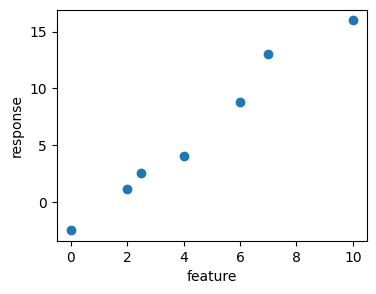

In [35]:
#### Values to use
x_values = np.array([0,2,2.5,4,6,7,10])
y_values = np.array([-2.5,1.1,2.5,4,8.8,13,16])


# We will cover visualization later, but here we have a snippet to get an idea on how the data is
import matplotlib.pyplot
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot()
ax.scatter(x_values,y_values)
ax.set_xlabel("feature")
ax.set_ylabel("response")

In [69]:
### Compute the terms in the equations: sxy, sx^2, n, m and r_xy

avg_x = np.mean(x_values)
avg_y = np.mean(y_values)
s_xy = np.sum((x_values - avg_x)*(y_values - avg_y))
s_x2 = np.sum((x_values - avg_x)**2)

m = s_xy/s_x2
n = avg_y - m*avg_x

r_xy_num = np.mean(x_values*y_values) - avg_x*avg_y
r_xy_denom_sqrd = (np.mean(x_values**2) - avg_x**2)*(np.mean(y_values**2) - avg_y**2)
r_xy = r_xy_num/np.sqrt(r_xy_denom_sqrd)

print("y = {:.4f}x + {:.4f} (r2 = {:.4f})".format(m,n,r_xy**2))

y = 1.9453x + -2.6254 (r2 = 0.9769)


In [ ]:
#### This will be an exercise on visualization!

In [70]:
### values for the line
xtest = np.linspace(0,10,50)
ytest = m*xtest + n

Text(0, 0.5, 'response')

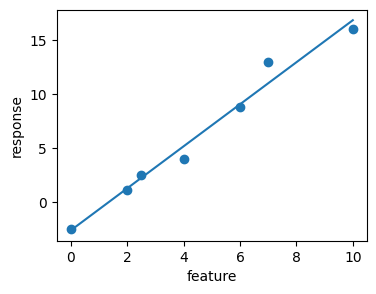

In [71]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot()
ax.scatter(x_values,y_values)
ax.plot(xtest,ytest)
ax.set_xlabel("feature")
ax.set_ylabel("response")

In [54]:
np.polyfit(x_values,y_values,deg=1)

array([ 1.94532374, -2.62538541])